The goal here is to make the model generalize well to the cross validation set

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import utils
from PIL import Image
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers. normalization import BatchNormalization
import numpy as np
import os
import imageio
import matplotlib.pyplot as plt
from random import shuffle
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import pickle

C:\Users\harinsa\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [8]:
labels= pd.read_csv('labels.csv')
labels = labels.set_index('id')
enc = OneHotEncoder(sparse=False)
enc.fit(labels)
onehot_label = enc.transform(labels)
classes = labels.breed.unique()


def get_processed_train():
    train_data = []
    IMG_SIZE = 300
    
    imgs = list(os.listdir('train'))
    shuffle(imgs)

    for img in imgs[:5000]:
        img_id = img.split('.')[0]
        label = enc.transform([labels.loc[img_id]])[0]
        path = os.path.join('train', img)
        img = Image.open(path)
        img = img.convert('L')
        img = img.resize((IMG_SIZE, IMG_SIZE), Image.ANTIALIAS)
        X = np.array(img).reshape(IMG_SIZE, IMG_SIZE, 1)
        train_data.append([img_id, X, label])
    shuffle(train_data)
    return train_data


def sample_prediction(X, y, ids, p):
    i = int(np.random.uniform() * len(y))
    
    pred_label = enc.inverse_transform((p[i] == np.max(p[i])).astype(int).reshape(1, -1))[0][0]
    true_label = enc.inverse_transform([y[i]])[0][0]
    
    print(ids[i])
    path = os.path.join('train', ids[i] +'.jpg')
    img = Image.open(path)
    plt.imshow(img)
    plt.title(f"Original Image ({true_label})")
    plt.show()
    print(f"predicted = {pred_label}, actual = {true_label}, Correct = {pred_label==true_label}")
    
    plt.title('Trained Image')
    plt.imshow(Image.fromarray(X[i].reshape(300,300)))


In [4]:
# data = utils.get_processed_train()
# pickle.dump(data, open('./processed.p', 'wb'))

data = pickle.load(open('./processed.p', 'rb'))

In [5]:
train_ids = np.array([d[0] for d in data])
X = np.array([d[1] for d in data])
y = np.array([d[2] for d in data])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, shuffle=False)

In [6]:
X_train_s = X_train[:1000]
y_train_s = y_train[:1000]
X_test_s = X_test[:500]
y_test_s = y_test[:500]

In [9]:
IMG_SIZE = 300

model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(len(classes), activation = 'softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
model.fit(X_test, y_test, batch_size =  50, epochs = 5, verbose = 1)
model.evaluate(X_test, y_test)

Epoch 1/5
1650/1650 [==============================] - 10s 6ms/step - loss: 7.3133 - acc: 0.0145
Epoch 2/5
1650/1650 [==============================] - 10s 6ms/step - loss: 2.1473 - acc: 0.5521
Epoch 3/5
1650/1650 [==============================] - 10s 6ms/step - loss: 0.5858 - acc: 0.8782
Epoch 4/5
1650/1650 [==============================] - 10s 6ms/step - loss: 0.1394 - acc: 0.9782
Epoch 5/5
1650/1650 [==============================] - 4s 2ms/step


[0.05376263203042926, 0.9951515151515151]

In [36]:
from PIL import Image

In [50]:
def show_sample():
    i = int(np.random.uniform() * len(X_test))
    x = X_test[i]
    y = y_test[i]
    img = Image.fromarray(x.reshape(300,300))
    plt.imshow(img)
    label=enc.inverse_transform([y])[0][0]
    plt.title(label)

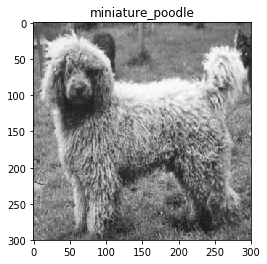

In [62]:
show_sample()